Importing Libraries

In [6]:
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import math
import plotly.express as px
import itertools

     |████████████████████████████████| 15.3 MB 10.8 MB/s eta 0:00:01


Importing the data

In [147]:
df = pd.read_csv("https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/vehicles.csv")

/Users/ketakikolhatkar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (73,74,76) have mixed types.Specify dtype option on import or set low_memory=False.



Checking the columns - features of the data 

In [9]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

Describing the dependent feature UCity 

In [10]:
df['UCity'].describe()

count    40081.000000
mean        22.981798
std         10.473444
min          0.000000
25%         18.110500
50%         21.296500
75%         25.700000
max        224.800000
Name: UCity, dtype: float64

The Dependent Variable  

Box plot of the UCity column over the years

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

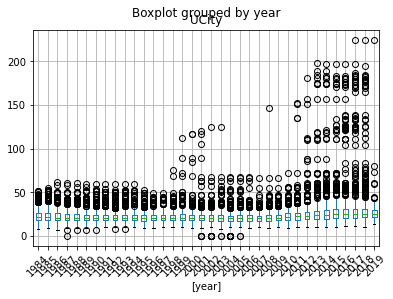

In [11]:
df.boxplot(column=['UCity'], by=['year'], rot=45)

Distribution of fuelType by count when UCity is greater than 75


<AxesSubplot:xlabel='fuelType', ylabel='Count'>

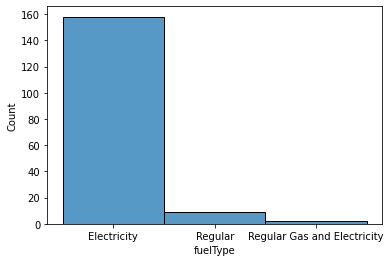

In [12]:
# filtering the UCity greater than 75 and plotting that against the vehicles

df1 = df[df['UCity'] > 75]
sns.histplot(data = df1, x = df1['fuelType'])

Zero UCity vehicles

In [13]:
df['UCity'].value_counts()[0]

25

Columns where the UCity value is zero

In [14]:
df3 = df[df['UCity'] == 0]
df3[['make', 'model', 'fuelType']]

,make,model,fuelType
8127,Ford,F150 Dual-fuel 2WD (CNG),Gasoline or natural gas
8128,Ford,F150 Dual-fuel 4WD (CNG),Gasoline or natural gas
8129,Ford,F150 Dual-fuel 2WD (LPG),Gasoline or propane
8130,Ford,F150 Dual-fuel 4WD (LPG),Gasoline or propane
9174,Dodge,Ram Van 2500 2WD CNG,CNG
9175,Dodge,Ram Wagon 2500 2WD CNG,CNG
9183,Ford,F150 Dual-fuel 2WD (CNG),Gasoline or natural gas
9184,Ford,F150 Dual-fuel 4WD (CNG),Gasoline or natural gas
9185,Ford,F150 Dual-fuel 2WD (LPG),Gasoline or propane
9186,Ford,F150 Dual-fuel 4WD (LPG),Gasoline or propane


The Independent Variables

1. Numeric feature: atvType

In [17]:
df['atvType'].describe()

count     3374
unique       8
top        FFV
freq      1412
Name: atvType, dtype: object

Checking the total number of vehicles for each type of atvType

In [18]:
df4 = df[['atvType']]
df4.groupby(['atvType'])['atvType'].count()

atvType
Bifuel (CNG)        20
Bifuel (LPG)         8
CNG                 50
Diesel            1070
EV                 168
FFV               1412
Hybrid             539
Plug-in Hybrid     107
Name: atvType, dtype: int64

Checking the total number of Nan values is the atvType column 

In [19]:
df4['atvType'].isna().sum()

36707

Line Graph of the atvType over the years 

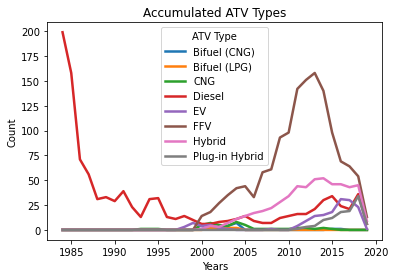

In [27]:
df_year_atvtype = pd.DataFrame()
df_year_atvtype['Years'] = df['year']
df_year_atvtype['atvType'] = df['atvType']
# Drop the rows where 'atvType' is NaN
df_year_atvtype_notna = df_year_atvtype.dropna(subset=['atvType'])
# Accumulate ATV types individually according to years
accumulated_types = df_year_atvtype_notna.groupby('Years')['atvType'].value_counts().unstack(fill_value=0)
# Filter out the values that are zero
accumulated_types = accumulated_types[accumulated_types.sum(axis=1) != 0]
for column in accumulated_types.columns:
    plt.plot(accumulated_types.index, accumulated_types[column], label=column, linewidth=2.5)
plt.title('Accumulated ATV Types')
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend(title='ATV Type')
plt.show()

Box plot of EV over the years 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

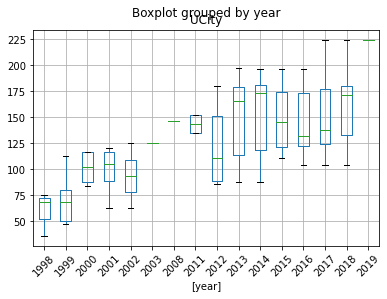

In [28]:
df6 = df[['year', 'atvType', 'UCity']]
df6 = df6[df6['atvType'] == 'EV']
df6.boxplot(column=['UCity'], by=['year'], rot=45)

Box Plot of Diesel vehicles over the years 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

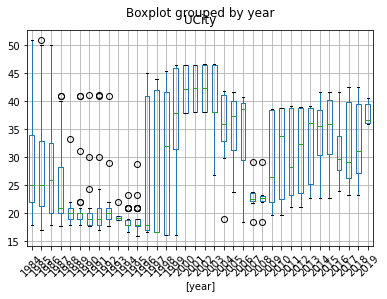

In [29]:
df7 = df[['year', 'atvType', 'UCity']]
df7 = df7[df7['atvType'] == 'Diesel']
df7.boxplot(column=['UCity'], by=['year'], rot=45)

Box Plot of FFV vehicles over the years

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

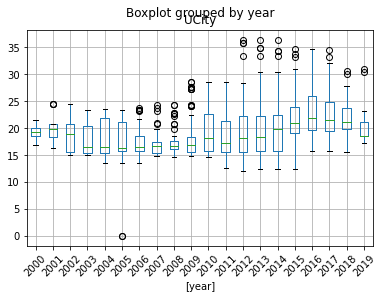

In [30]:
df8 = df[['year', 'atvType', 'UCity']]
df8 = df8[df8['atvType'] == 'FFV']
df8.boxplot(column=['UCity'], by=['year'], rot=45)

Box Plot of CNG vehicles over the years

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

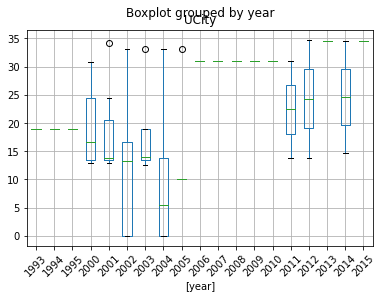

In [32]:
df10 = df[['year', 'atvType', 'UCity']]
df10 = df10[df10['atvType'] == 'CNG']
df10.boxplot(column=['UCity'], by=['year'], rot=45)

Box Plot of Hybrid vehicles over the years

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

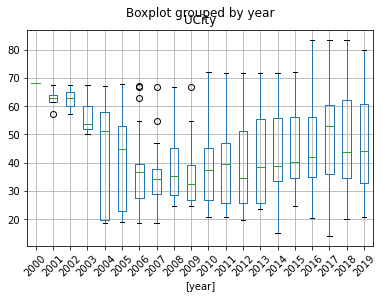

In [33]:
df11 = df[['year', 'atvType', 'UCity']]
df11 = df11[df11['atvType'] == 'Hybrid']
df11.boxplot(column=['UCity'], by=['year'], rot=45)

2. Numeric feature: barrelsA08

Box Plot of barrelsA08 over the years

<AxesSubplot:title={'center':'barrels08'}, xlabel='[year]'>

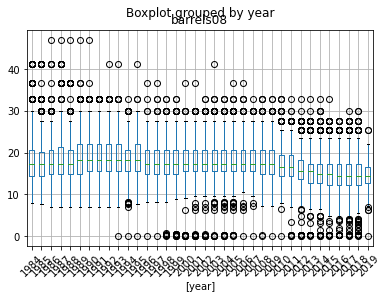

In [34]:
df.boxplot(column=['barrels08'], by=['year'], rot=45)

Scatter Plot of barrelsA08 over the years

<AxesSubplot:xlabel='year', ylabel='barrelsA08'>

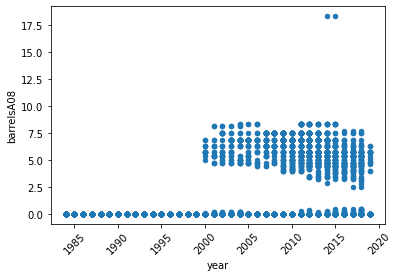

In [35]:
df.plot.scatter(x = 'year', y = 'barrelsA08', rot=45)

3. Numeric feature: chargeXXXX

Describing the feature

In [36]:
df['charge240'].describe()

count    40081.000000
mean         0.036086
std          0.534894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: charge240, dtype: float64

Scatter plot of charge240 

<AxesSubplot:>

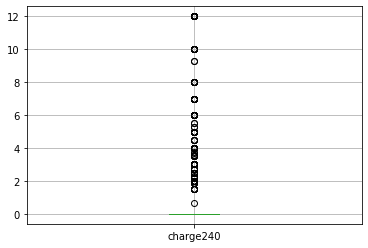

In [37]:
df.boxplot(column=['charge240'])

All non-EVs having zero value for this charge240

In [44]:
df16 = df['charge240'].value_counts()
total = df16[df16.index != 0].sum()
total

252

All non-EVs having zero value for this charge240b

In [45]:
df16 = df['charge240b'].value_counts()
total = df16[df16.index != 0].sum()
total

62

4. Numeric feature: cityXXXX

In [46]:
df17 = df[['city08', 'city08U', 'cityA08', 'cityA08U', 'cityE', 'cityUF', 'phevCity', 'UCity']]
fig = px.imshow(df17.corr())
fig.show()

Scatter plot of city08 vs UCity

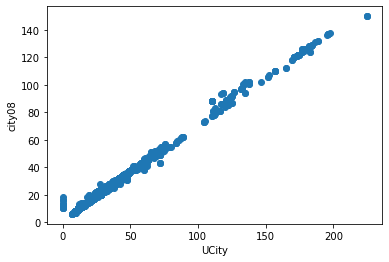

In [47]:
plt.scatter(df['UCity'], df['city08'])
plt.xlabel('UCity')
plt.ylabel('city08')
plt.show()

Box Plot of city08 every year

<AxesSubplot:title={'center':'city08'}, xlabel='[year]'>

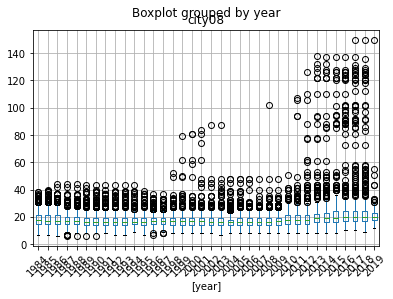

In [48]:
df.boxplot(column=['city08'], by=['year'], rot=45)

Box Plot of city08U per year

<AxesSubplot:title={'center':'city08U'}, xlabel='[year]'>

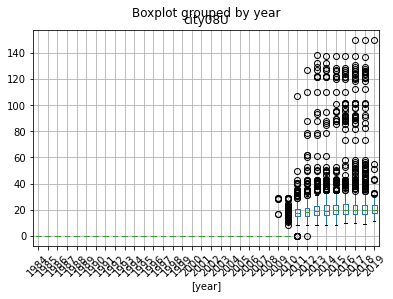

In [49]:
df.boxplot(column=['city08U'], by=['year'], rot=45)

Box Plot of cityA08 per year

<AxesSubplot:title={'center':'cityA08'}, xlabel='[year]'>

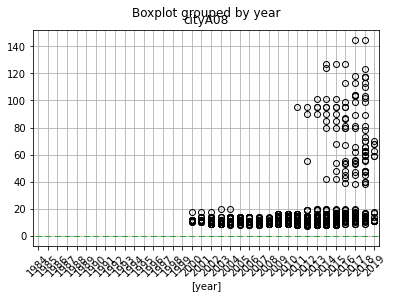

In [50]:
df.boxplot(column=['cityA08'], by=['year'], rot=45)

Box Plot of cityA08U per year

<AxesSubplot:title={'center':'cityA08U'}, xlabel='[year]'>

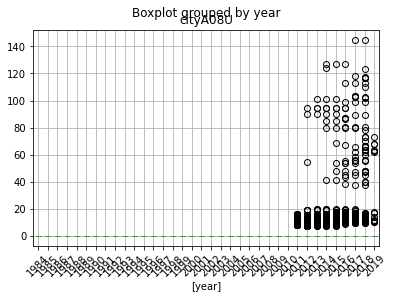

In [51]:
df.boxplot(column=['cityA08U'], by=['year'], rot=45)

Box Plot of phevCity per year

<AxesSubplot:title={'center':'phevCity'}, xlabel='[year]'>

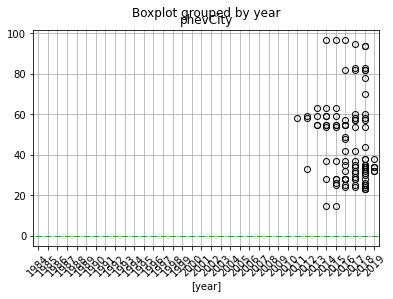

In [52]:
df.boxplot(column=['phevCity'], by=['year'], rot=45)

5. Numeric feature: co2XXXX

Vehicles that don't have co2 information

In [53]:
df18 = df[df['co2'] == -1]
df18.shape

(31954, 83)

Box plot of co2 against the years

<AxesSubplot:title={'center':'co2'}, xlabel='[year]'>

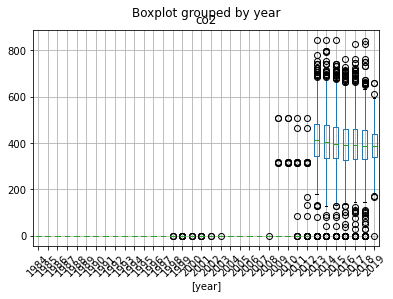

In [54]:
df.boxplot(column=['co2'], by=['year'], rot=45)

Box plot of co2A against the years

<AxesSubplot:title={'center':'co2A'}, xlabel='[year]'>

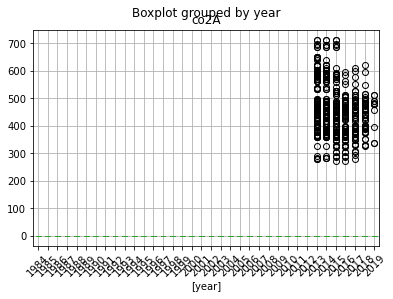

In [55]:
df.boxplot(column=['co2A'], by=['year'], rot=45)

Box plot of co2TailpipeAGpm against the years

<AxesSubplot:title={'center':'co2TailpipeAGpm'}, xlabel='[year]'>

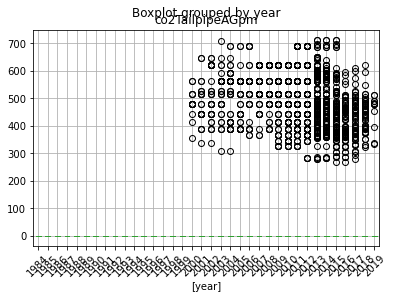

In [56]:
df.boxplot(column=['co2TailpipeAGpm'], by=['year'], rot=45)

Scatter plot between co2 and UCity 

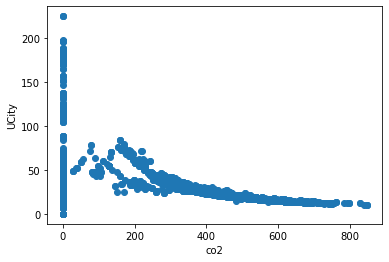

In [57]:
plt.scatter(df['co2'], df['UCity'])
plt.xlabel('co2')
plt.ylabel('UCity')
plt.show()

Histogram of vehicles with the co2 information

<AxesSubplot:xlabel='fuelType', ylabel='Count'>

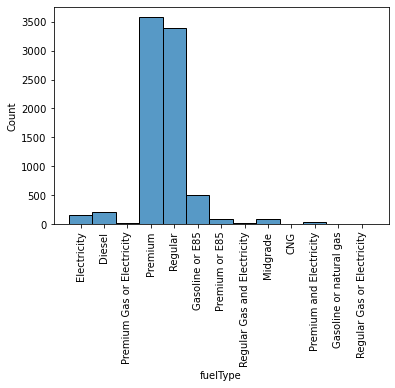

In [58]:
df19 = df[df['co2'] != -1]
df19.groupby('fuelType')['fuelType'].size()
plt.xticks(rotation=90)
sns.histplot(data = df19, x = df19['fuelType'])

Box plots of vehicles vs the co2 emission 

<AxesSubplot:xlabel='fuelType', ylabel='co2'>

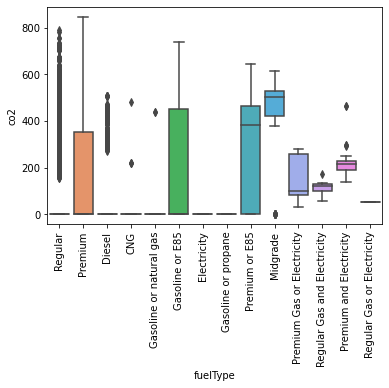

In [59]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='fuelType', y='co2')

6. Numeric feature: cylinders 

Describing the column 

In [60]:
df['cylinders'].describe()

count    39910.000000
mean         5.721949
std          1.754891
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

Histogram of cylinders 

<AxesSubplot:xlabel='cylinders'>

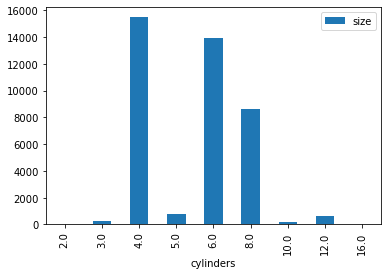

In [61]:
df20 = df.groupby('cylinders', as_index = False)['cylinders'].size()
df20.plot(x="cylinders", y=["size"], kind="bar")

Correlation matrix of UCity and Cylinders

In [62]:
df21 = df[['UCity', 'cylinders']]
df21.corr()

,UCity,cylinders
UCity,1.000000,-0.679927
cylinders,-0.679927,1.000000


2 Cylinder Vehicles

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

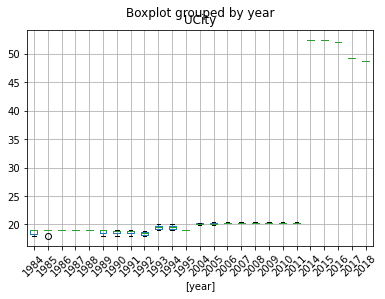

In [63]:
df22 = df[df['cylinders'] == 2.0]
df22.boxplot(column=['UCity'], by=['year'], rot=45)

3 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

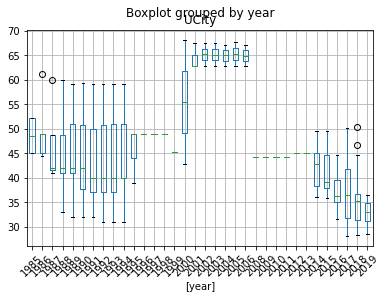

In [64]:
df23 = df[df['cylinders'] == 3.0]
df23.boxplot(column=['UCity'], by=['year'], rot=45)

4 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

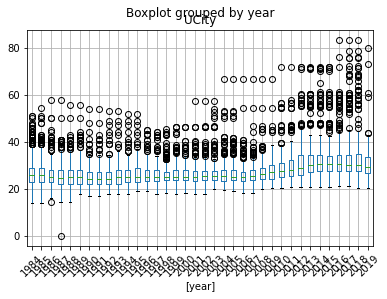

In [65]:
df24 = df[df['cylinders'] == 4.0]
df24.boxplot(column=['UCity'], by=['year'], rot=45)

5 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

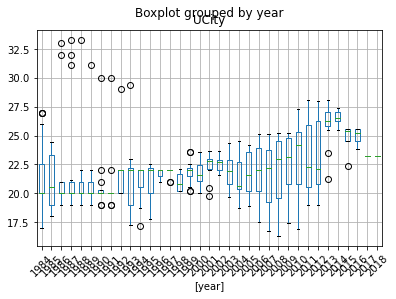

In [66]:
df25 = df[df['cylinders'] == 5.0]
df25.boxplot(column=['UCity'], by=['year'], rot=45)

6 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

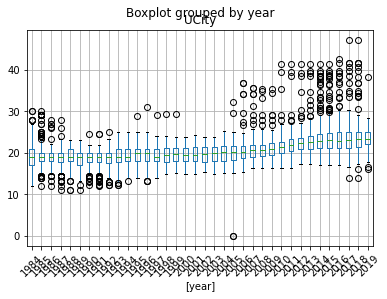

In [67]:
df26 = df[df['cylinders'] == 6.0]
df26.boxplot(column=['UCity'], by=['year'], rot=45)

8 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

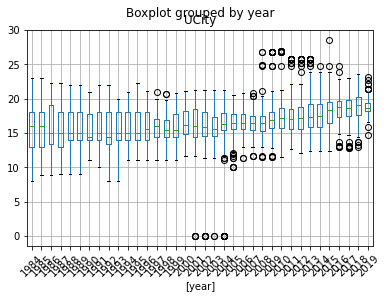

In [68]:
df27 = df[df['cylinders'] == 8.0]
df27.boxplot(column=['UCity'], by=['year'], rot=45)

10 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

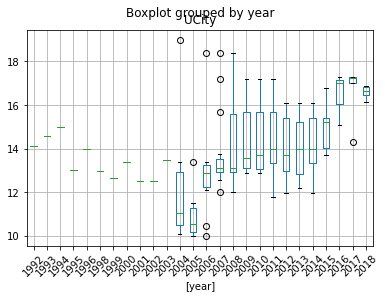

In [69]:
df28 = df[df['cylinders'] == 10.0]
df28.boxplot(column=['UCity'], by=['year'], rot=45)

12 Cylinder Vehicles 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

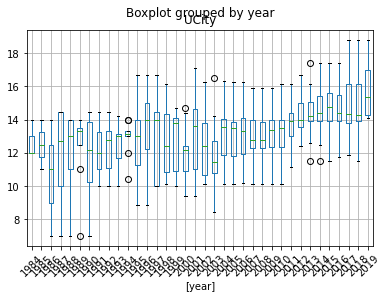

In [70]:
df29 = df[df['cylinders'] == 12.0]
df29.boxplot(column=['UCity'], by=['year'], rot=45)

16 Cylinder Vehicles

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

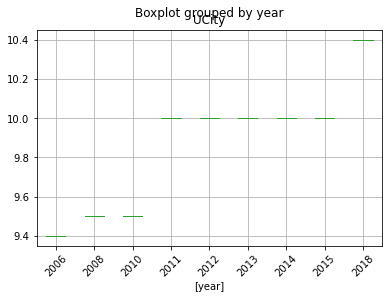

In [71]:
df30 = df[df['cylinders'] == 16.0]
df30.boxplot(column=['UCity'], by=['year'], rot=45)

7. Numeric feature: displ

Correlation between UCity and displ

In [72]:
df['displ'].corr(df['UCity'])

-0.7132493488120356

Scatter plot between displ and UCity 

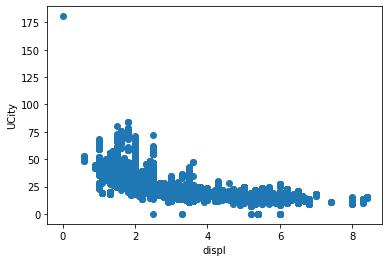

In [73]:
plt.scatter(df['displ'], df['UCity'])
plt.xlabel('displ')
plt.ylabel('UCity')
plt.show()

Correlation between disp_cat and UCity 

In [74]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

Histogram of displ category to the vehicle count 

<AxesSubplot:xlabel='displ'>

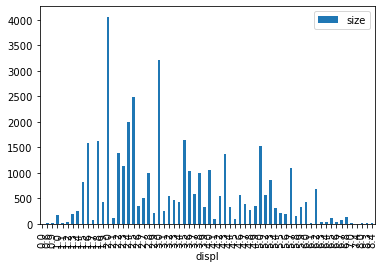

In [75]:
df31 = df.groupby('displ', as_index = False)['fuelType'].size()
df31.plot(x="displ", y=["size"], kind="bar")

Box plot of disp_num over the years 

<AxesSubplot:title={'center':'displ'}, xlabel='[year]'>

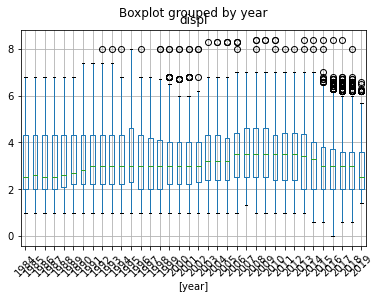

In [76]:
df.boxplot(column=['displ'], by=['year'], rot=45)

8. Numeric feature: evMotor 

In [77]:
df34 = df[(df['atvType'] == 'EV') | (df['atvType'] == 'Hybrid') | (df['atvType'] == 'Plug-in Hybrid')]
df34 = df34['evMotor'].dropna()
df34.shape

(736,)

9. Numeric feature: feScore

feScore for post-2012 vehicles 

In [78]:
df35 = df[df['year'] >= 2012]
df35[df35['feScore'] != -1].shape

(8054, 83)

Box Plot of feScore over the years 

<AxesSubplot:title={'center':'feScore'}, xlabel='[year]'>

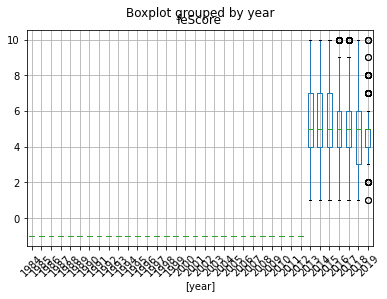

In [79]:
df.boxplot(column=['feScore'], by=['year'], rot=45)

Correlation between feScore with UCity 

In [80]:
df['feScore'].corr(df['UCity'])

0.39783445694118663

Scatter plot of feScore and UCity 

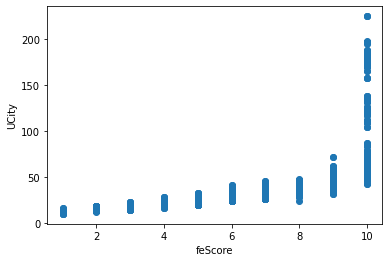

In [81]:
df36 = df[df['feScore'] != -1]
plt.scatter(df36['feScore'], df36['UCity'])
plt.xlabel('feScore')
plt.ylabel('UCity')
plt.show()

10. Numeric feature: combXXXX

Correlation matrix 

In [82]:
df37 = df[['comb08', 'comb08U', 'combA08', 'combE', 'combinedCD', 'combinedUF', 'UCity']]
fig = px.imshow(df37.corr())
fig.show()

Box Plot for comb08 over the years 

<AxesSubplot:title={'center':'comb08'}, xlabel='[year]'>

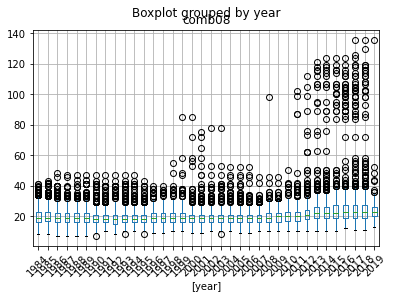

In [83]:
df.boxplot(column=['comb08'], by=['year'], rot=45)

Box plot for comb08U over the years 

<AxesSubplot:title={'center':'comb08U'}, xlabel='[year]'>

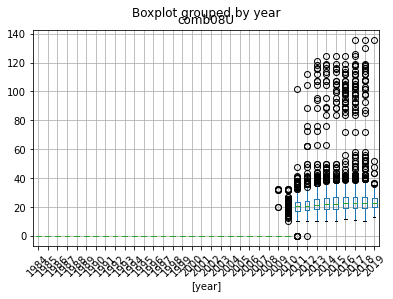

In [84]:
df.boxplot(column=['comb08U'], by=['year'], rot=45)

Box plot for combA08 over the years 

<AxesSubplot:title={'center':'combA08'}, xlabel='[year]'>

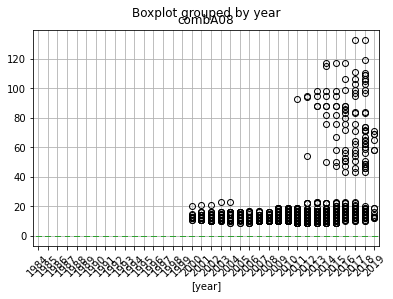

In [85]:
df.boxplot(column=['combA08'], by=['year'], rot=45)

Box plot for combA08U over the years 

<AxesSubplot:title={'center':'combA08U'}, xlabel='[year]'>

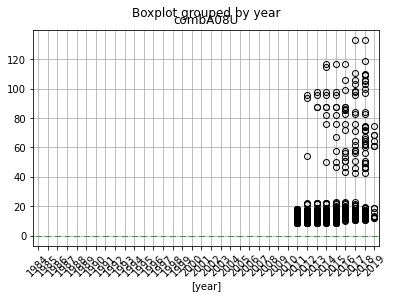

In [86]:
df.boxplot(column=['combA08U'], by=['year'], rot=45)

Box Plot for combE over the years 

<AxesSubplot:title={'center':'combE'}, xlabel='[year]'>

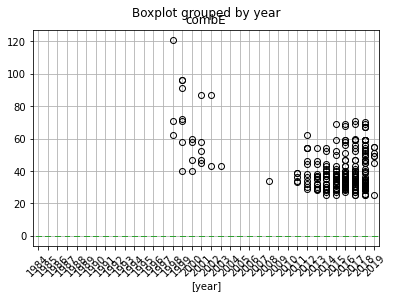

In [87]:
df.boxplot(column=['combE'], by=['year'], rot=45)

Box Plot of combinedCD over the years 

<AxesSubplot:title={'center':'combinedCD'}, xlabel='[year]'>

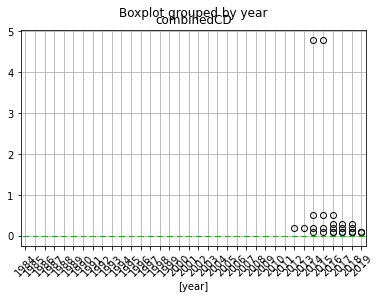

In [88]:
df.boxplot(column=['combinedCD'], by=['year'], rot=45)

Box Plot of combinedUF over the years 

<AxesSubplot:title={'center':'combinedUF'}, xlabel='[year]'>

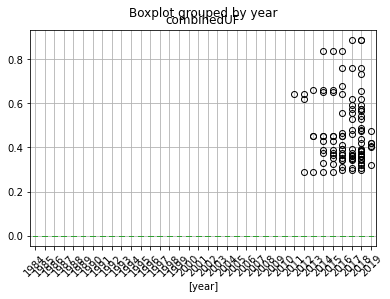

In [89]:
df.boxplot(column=['combinedUF'], by=['year'], rot=45)

11. Numeric feature: fuelCostXXXX

Describing the fuelCost08 feature

In [90]:
df['fuelCost08'].describe()

count    40081.000000
mean      2377.809935
std        650.164538
min        500.000000
25%       1950.000000
50%       2350.000000
75%       2700.000000
max       7350.000000
Name: fuelCost08, dtype: float64

Describing the fuelCostA08 feature

In [91]:
df['fuelCostA08'].describe()

count    40081.000000
mean        90.062623
std        472.905402
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3800.000000
Name: fuelCostA08, dtype: float64

In [92]:
df['fuelType'].unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Electricity', 'Gasoline or propane',
       'Premium or E85', 'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

12. Numeric feature: fuelTypeX

In [93]:
df['fuelType'].unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Electricity', 'Gasoline or propane',
       'Premium or E85', 'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

Line Graph of fuelType over the years

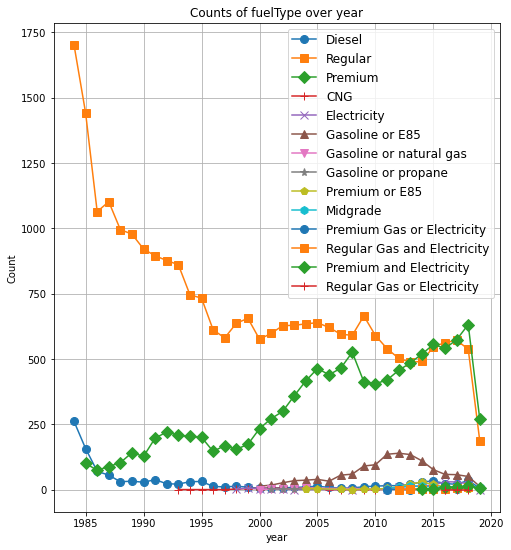

In [156]:
def plot_counts_over_years(df, x_col, y_col):
    df_year_fueltype = pd.DataFrame()
    df_year_fueltype[x_col] = df[x_col]
    df_year_fueltype[y_col] = df[y_col]
    df_year_fueltype_notna = df_year_fueltype.dropna(subset=[y_col])
    fueltype_counts = df_year_fueltype_notna.groupby([x_col, y_col]).size().reset_index(name='count')
    
    # Define a list of marker symbols
    marker_symbols = ['o', 's', 'D', '+', 'x', '^', 'v', '*', 'p', 'h']

    # Create a dictionary mapping fuel types to marker symbols
    marker_dict = {fuel_type: marker_symbols[i % len(marker_symbols)] for i, fuel_type in enumerate(fueltype_counts[y_col].unique())}

    plt.figure(figsize=(8,9))

    for fuel_type in fueltype_counts[y_col].unique():
        fuel_type_data = fueltype_counts[fueltype_counts[y_col] == fuel_type]
        plt.plot(fuel_type_data[x_col], fuel_type_data['count'], marker=marker_dict[fuel_type], markersize=8, linestyle='-', label=fuel_type)

    plt.title(f'Counts of {y_col} over {x_col}')
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.legend(loc='upper right', fontsize='large')
    plt.grid(True)
    plt.show()

plot_counts_over_years(df, 'year', 'fuelType')

Line Graph of fuelType1 over the years

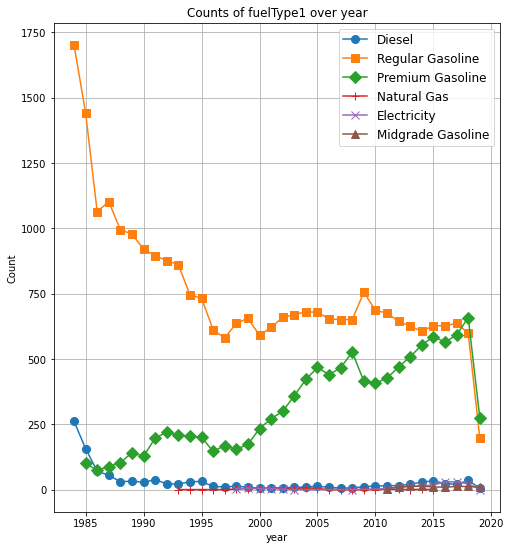

In [157]:
plot_counts_over_years(df, 'year', 'fuelType1')

Line Graph of fuelType2 over the years

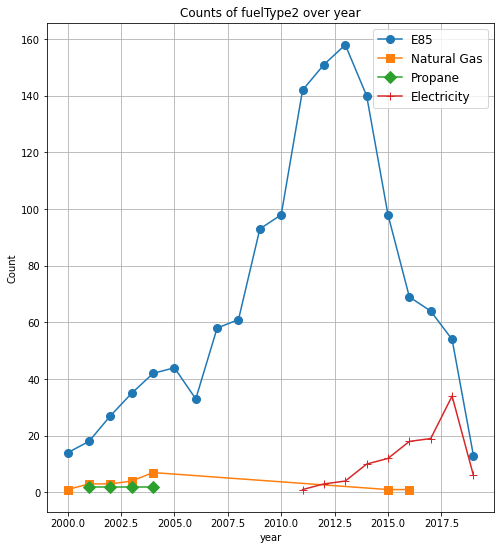

In [158]:
plot_counts_over_years(df, 'year', 'fuelType2')

13. Numeric feature: ghgScore 

Correlation matrix of feScore ghgScore and UCity

In [94]:
df38 = df[['feScore', 'ghgScore', 'UCity']]
fig = px.imshow(df38.corr())
fig.show()

Vehicles with ghgScore

In [95]:
df39 = df.groupby('ghgScore', as_index = False)['fuelType'].size()
df39

,ghgScore,size
0,-1,32027
1,1,163
2,2,371
3,3,855
4,4,1570
5,5,2081
6,6,1196
7,7,962
8,8,491
9,9,116


Box Plot of ghgScore over the years 

<AxesSubplot:title={'center':'ghgScore'}, xlabel='[year]'>

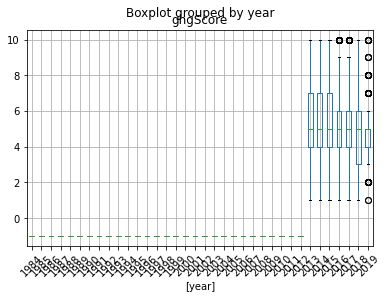

In [96]:
df.boxplot(column=['ghgScore'], by=['year'], rot=45)

Correlation between ghgScore and UCity

In [97]:
df['ghgScore'].corr(df['UCity'])

0.3973775917099092

Box Plot of feScore vs UCity

<AxesSubplot:xlabel='feScore', ylabel='UCity'>

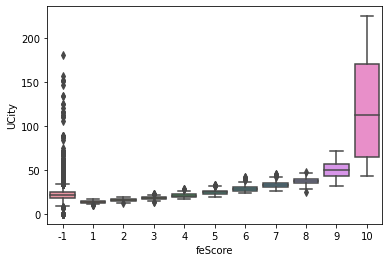

In [100]:
sns.boxplot(x='feScore', y='UCity', data=df)

14. Numeric feature: highwayXXXX

In [101]:
df40 = df[['highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'UHighway', 'UHighwayA', 'UCity']]
fig = px.imshow(df40.corr())
fig.show()

15. Numeric feature: volume hlv, hpv, lv2, lv4, pv2, pv4

Correlation matrix 

In [102]:
df41 = df[['hlv', 'hpv', 'lv2', 'lv4', 'pv2', 'pv4', 'UCity']]
fig = px.imshow(df41.corr())
fig.show()

Histogram of hpv vs its frequency

<AxesSubplot:xlabel='hpv'>

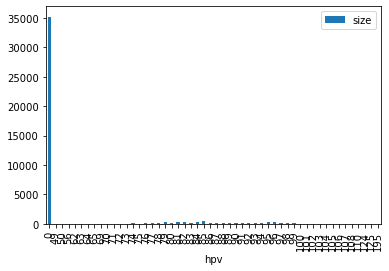

In [103]:
df42 = df.groupby('hpv', as_index=False)['hpv'].size()
df42.plot(x="hpv", y=["size"], kind="bar")

Histogram of hlv vs its frequency

<AxesSubplot:xlabel='hlv'>

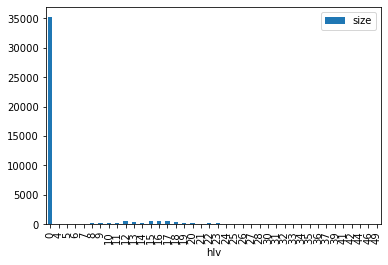

In [104]:
df43 = df.groupby('hlv', as_index=False)['hlv'].size()
df43.plot(x="hlv", y=["size"], kind="bar")

Scatter plot of hlv over the years 

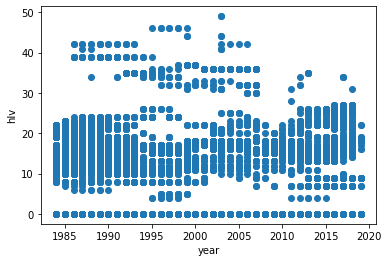

In [105]:
df44 = df[['hlv', 'year']]
plt.scatter(df44['year'], df44['hlv'])
plt.xlabel('year')
plt.ylabel('hlv')
plt.show()

Scatter plot of hpv over the years

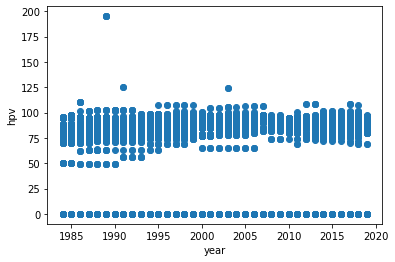

In [106]:
df45 = df[['hpv', 'year']]
df45 = df45.dropna()
plt.scatter(df45['year'], df45['hpv'])
plt.xlabel('year')
plt.ylabel('hpv')
plt.show()

16. Numeric feature: range

In [107]:
df['range'].describe()

count    40081.000000
mean         0.616377
std         11.133278
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        335.000000
Name: range, dtype: float64

Correlation between range and UCity 

1.   List item

1.   List item
2.   List item


2.   List item



In [108]:
df['range'].corr(df['UCity'])

0.6013585777904684

Scatter plot of range and UCity 

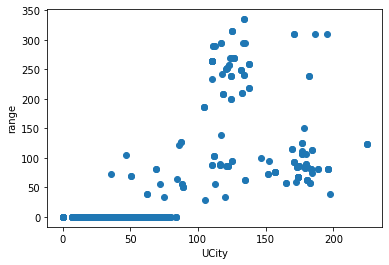

In [109]:
df46 = df[['range', 'UCity']]
plt.scatter(df46['UCity'], df46['range'])
plt.xlabel('UCity')
plt.ylabel('range')
plt.show()

Range value of EVs

In [110]:
df47 = df[['range', 'atvType']]
df47 = df[df['atvType'] == 'EV']
df47.shape

(168, 83)

17. Numeric feature: rangeXXXX

Describing rangeA vehicles

In [111]:
df['rangeA'].describe()

count     1542
unique     223
top        290
freq        74
Name: rangeA, dtype: object

Describing rangeCityA vehicles

In [112]:
df['rangeCityA'].describe()

count    40081.000000
mean         0.067532
std          1.639622
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        103.030000
Name: rangeCityA, dtype: float64

Describing rangeHwyA vehicles

In [113]:
df['rangeHwyA'].describe()

count    40081.000000
mean         0.062571
std          1.479728
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         90.550000
Name: rangeHwyA, dtype: float64

Correlation between range and UCity

In [114]:
df48 = df[['range', 'UCity']]
df48.corr()

,range,UCity
range,1.000000,0.601359
UCity,0.601359,1.000000


Box Plot of rangeA over the years

<AxesSubplot:title={'center':'rangeCity'}, xlabel='[year]'>

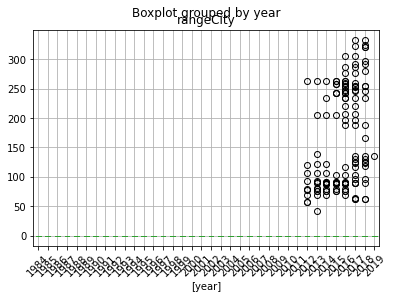

In [115]:
df.boxplot(column=['rangeCity'], by=['year'], rot=45)

<AxesSubplot:title={'center':'rangeCityA'}, xlabel='[year]'>

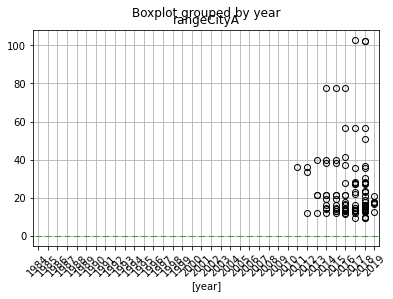

In [116]:
df.boxplot(column=['rangeCityA'], by=['year'], rot=45)

<AxesSubplot:title={'center':'rangeHwy'}, xlabel='[year]'>

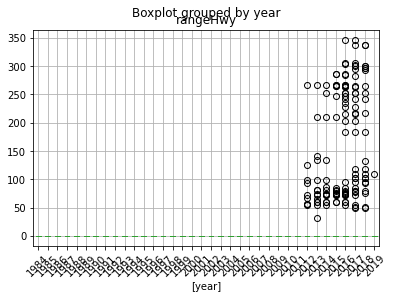

In [117]:
df.boxplot(column=['rangeHwy'], by=['year'], rot=45)

<AxesSubplot:title={'center':'rangeHwyA'}, xlabel='[year]'>

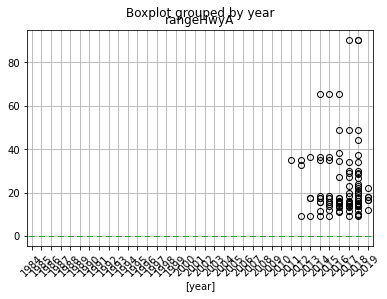

In [118]:
df.boxplot(column=['rangeHwyA'], by=['year'], rot=45)

18. Numeric feature: youSaveSpend

Describing the youSaveSpend column

In [119]:
df['youSaveSpend'].describe()

count    40081.000000
mean     -4134.565006
std       3256.499139
min     -29000.000000
25%      -5750.000000
50%      -4000.000000
75%      -2000.000000
max       5250.000000
Name: youSaveSpend, dtype: float64

Correlation between youSaveSpend and UCity

In [120]:
df49 = df[['youSaveSpend', 'UCity']]
df49.corr()

,youSaveSpend,UCity
youSaveSpend,1.000000,0.658371
UCity,0.658371,1.000000


Scatter plot of youSaveSpend vs UCity

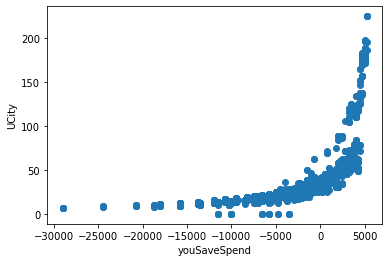

In [121]:
df50 = df[['youSaveSpend', 'UCity']]
plt.scatter(df50['youSaveSpend'], df50['UCity'])
plt.xlabel('youSaveSpend')
plt.ylabel('UCity')
plt.show()

Box Plot of youSaveSpend vs the years 

<AxesSubplot:title={'center':'youSaveSpend'}, xlabel='[year]'>

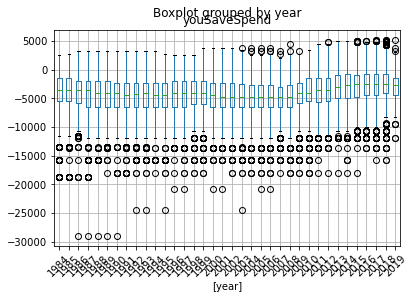

In [122]:
df.boxplot(column=['youSaveSpend'], by=['year'], rot=45)

Box Plot of different types of atvTypes over the years

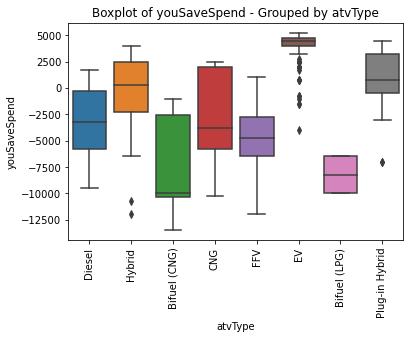

In [151]:
y_col = 'youSaveSpend'
x_col = 'atvType'

df_selected = df[[x_col, y_col]].copy()
df_selected = df_selected[df_selected[y_col] != -1]  # Drop rows with y_col = -1

sns.boxplot(x=x_col, y=y_col, data=df_selected)
plt.title(f'Boxplot of {y_col} - Grouped by {x_col}')
plt.xticks(rotation=90)
plt.show()

Box Plot of atvType over the years 

In [123]:
df['atvType'].dropna().unique()

array(['Diesel', 'Hybrid', 'Bifuel (CNG)', 'CNG', 'FFV', 'EV',
       'Bifuel (LPG)', 'Plug-in Hybrid'], dtype=object)

19. Categorical feature: drive 

In [124]:
df51 = df.groupby('drive', as_index = False)['drive'].size()
df51

,drive,size
0,2-Wheel Drive,507
1,4-Wheel Drive,1328
2,4-Wheel or All-Wheel Drive,6648
3,All-Wheel Drive,2713
4,Automatic (A1),1
5,Front-Wheel Drive,13939
6,Part-time 4-Wheel Drive,217
7,Rear-Wheel Drive,13539


Histogram of number of drive vehicles 

<AxesSubplot:xlabel='drive'>

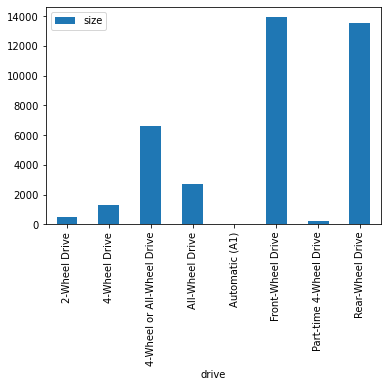

In [125]:
df51.plot(x="drive", y=["size"], kind="bar")

Correlation between UCity and drive

In [126]:
df['drive'].unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       'Automatic (A1)'], dtype=object)

Box plot between Rear-Wheel drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

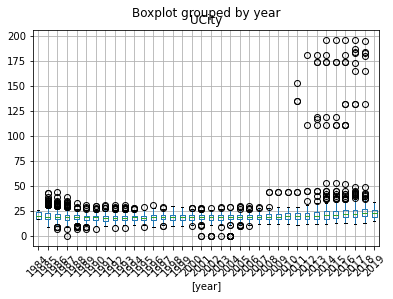

In [127]:
df52 = df[['drive', 'UCity', 'year']]
df52 = df52[df52['drive'] == 'Rear-Wheel Drive']
df52.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot between Front-Wheel drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

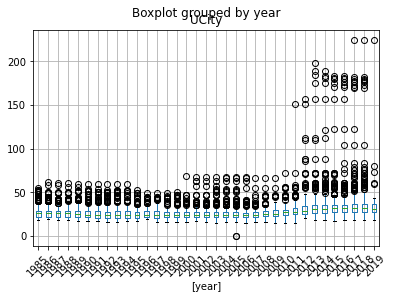

In [128]:
df53 = df[['drive', 'UCity', 'year']]
df53 = df53[df53['drive'] == 'Front-Wheel Drive']
df53.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot of 4-Wheel or All-Wheel Drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

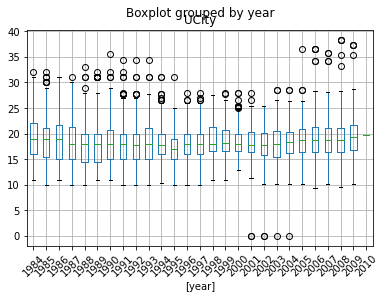

In [129]:
df54 = df[['drive', 'UCity', 'year']]
df54 = df54[df54['drive'] == '4-Wheel or All-Wheel Drive']
df54.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot of 2-Wheel Drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

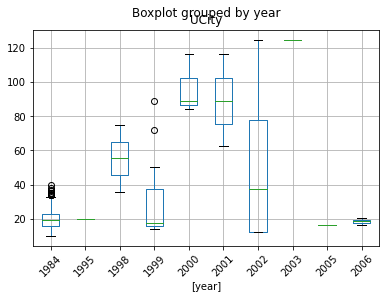

In [130]:
df55 = df[['drive', 'UCity', 'year']]
df55 = df55[df55['drive'] == '2-Wheel Drive']
df55.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot of All-Wheel Drive and UCity 

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

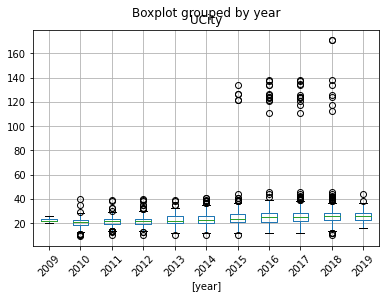

In [131]:
df56 = df[['drive', 'UCity', 'year']]
df56 = df56[df56['drive'] == 'All-Wheel Drive']
df56.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot of 4-Wheel Drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

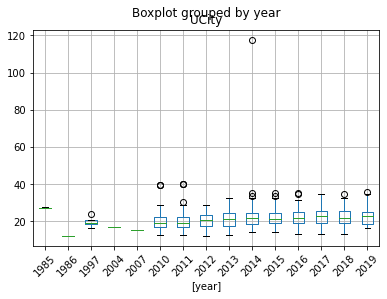

In [132]:
df57 = df[['drive', 'UCity', 'year']]
df57 = df57[df57['drive'] == '4-Wheel Drive']
df57.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot of Part-time 4-Wheel Drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

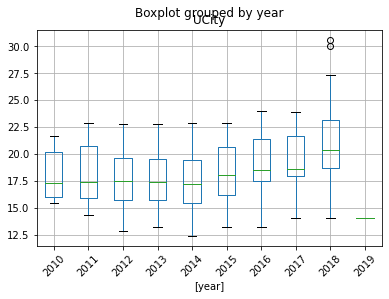

In [133]:
df58 = df[['drive', 'UCity', 'year']]
df58 = df58[df58['drive'] == 'Part-time 4-Wheel Drive']
df58.boxplot(column=['UCity'], by=['year'], rot=45)

Box plot of Automatic (A1) drive and UCity

<AxesSubplot:title={'center':'UCity'}, xlabel='[year]'>

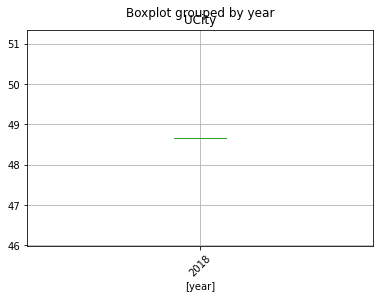

In [134]:
df59 = df[['drive', 'UCity', 'year']]
df59 = df59[df59['drive'] == 'Automatic (A1)']
df59.boxplot(column=['UCity'], by=['year'], rot=45)

20. Numeric feature: guzzler

Scatter plot of guzzler across the years 

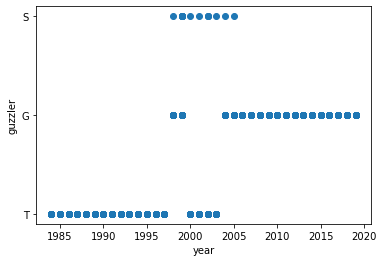

In [149]:
df_1 = df[['year', 'guzzler']].copy().dropna()
plt.scatter(df_1['year'], df_1['guzzler'])
plt.xlabel('year')
plt.ylabel('guzzler')
plt.show()

21. Categorical feature: mgpData

mgpData Y vehicles 

In [137]:
df61 = df[df['mpgData'] == 'Y']
df61.shape

(12714, 83)

Box Plot of mgpData over the years 

<AxesSubplot:title={'center':'size'}, xlabel='[year]'>

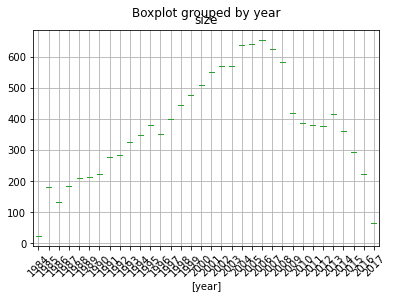

In [138]:
df62 = df61.groupby('year', as_index = False)['mpgData'].size()
df62.boxplot(column=['size'], by=['year'], rot=45)

##Ans 1 b. Insights from the data 

For getting new insights from the data, I have plotted the dependent feature UCity and the independent features cylinders, displ, fuelCostA08, comb08, combA08, co2 and fuelType change with respective to the different atvType. Below are the plots for each of them. 

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
              UCity  cylinders
UCity      1.000000  -0.755422
cylinders -0.755422   1.000000


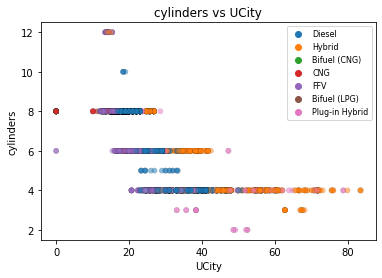

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
          UCity     displ
UCity  1.000000 -0.733715
displ -0.733715  1.000000


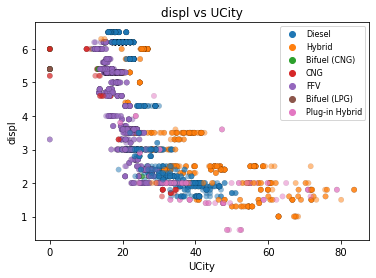

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
                UCity  fuelCostA08
UCity        1.000000    -0.569652
fuelCostA08 -0.569652     1.000000


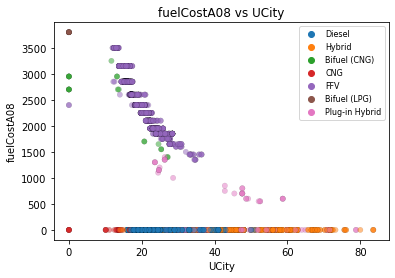

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           UCity    comb08
UCity   1.000000  0.979058
comb08  0.979058  1.000000


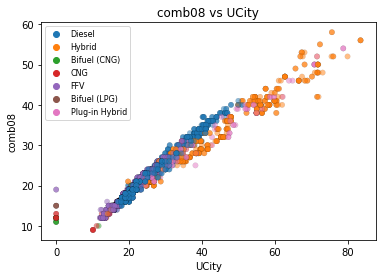

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
            UCity   combA08
UCity    1.000000  0.058135
combA08  0.058135  1.000000


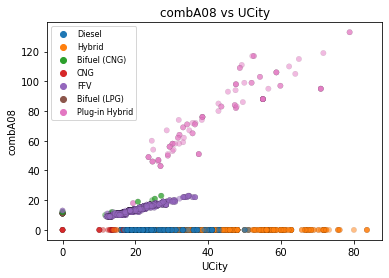

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
          UCity       co2
UCity  1.000000 -0.017166
co2   -0.017166  1.000000


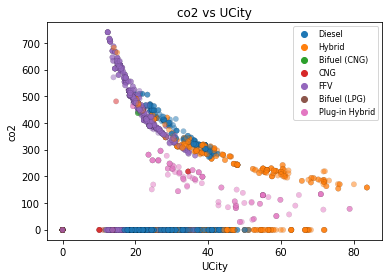

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
       UCity
UCity    1.0


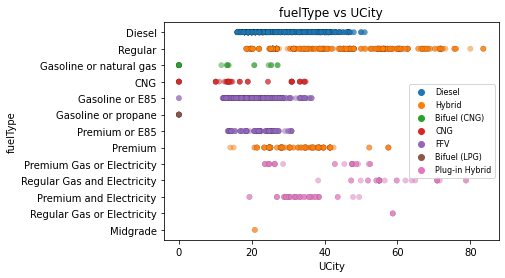

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           cylinders     displ
cylinders   1.000000  0.938859
displ       0.938859  1.000000


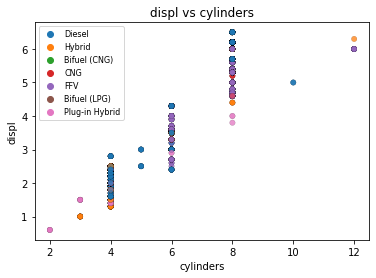

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
             cylinders  fuelCostA08
cylinders     1.000000     0.427774
fuelCostA08   0.427774     1.000000


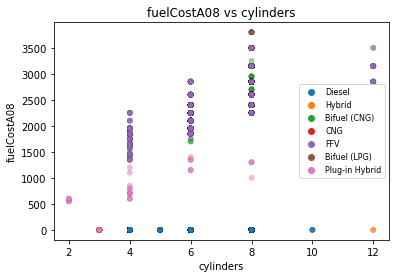

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           cylinders    comb08
cylinders   1.000000 -0.803121
comb08     -0.803121  1.000000


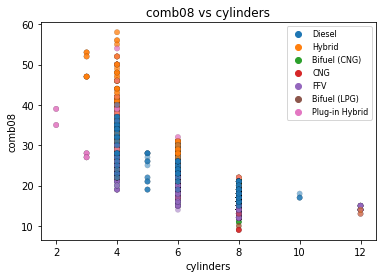

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           cylinders   combA08
cylinders   1.000000 -0.118155
combA08    -0.118155  1.000000


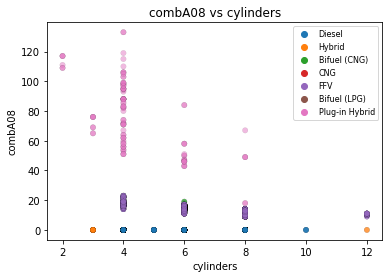

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           cylinders      co2
cylinders    1.00000 -0.02507
co2         -0.02507  1.00000


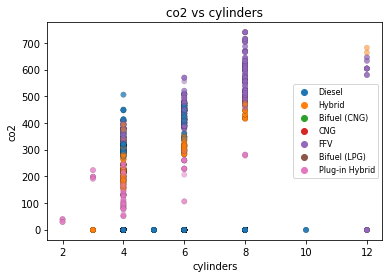

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           cylinders
cylinders        1.0


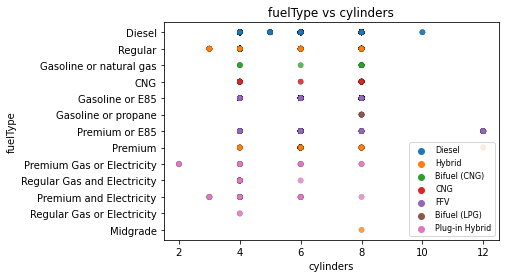

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
                displ  fuelCostA08
displ        1.000000     0.315725
fuelCostA08  0.315725     1.000000


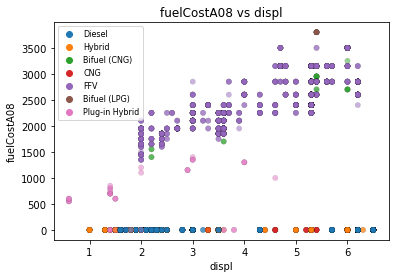

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           displ    comb08
displ   1.000000 -0.787729
comb08 -0.787729  1.000000


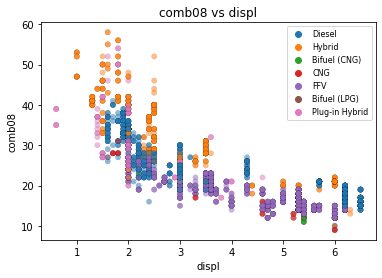

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
            displ   combA08
displ    1.000000 -0.165134
combA08 -0.165134  1.000000


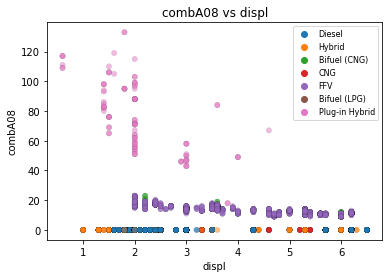

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
          displ       co2
displ  1.000000 -0.079624
co2   -0.079624  1.000000


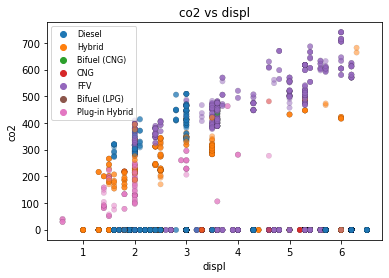

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
       displ
displ    1.0


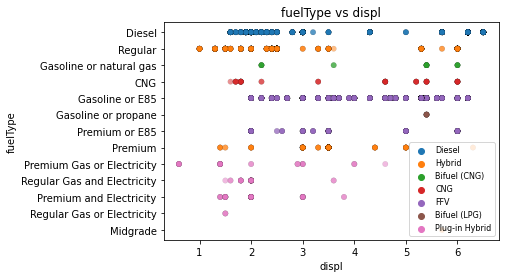

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
             fuelCostA08    comb08
fuelCostA08     1.000000 -0.577845
comb08         -0.577845  1.000000


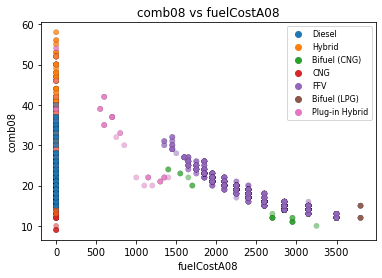

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
             fuelCostA08   combA08
fuelCostA08     1.000000  0.272918
combA08         0.272918  1.000000


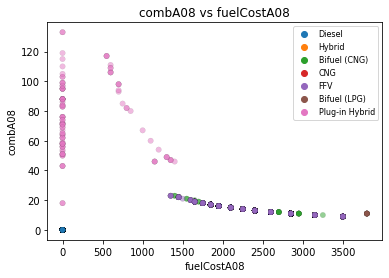

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
             fuelCostA08       co2
fuelCostA08     1.000000  0.214134
co2             0.214134  1.000000


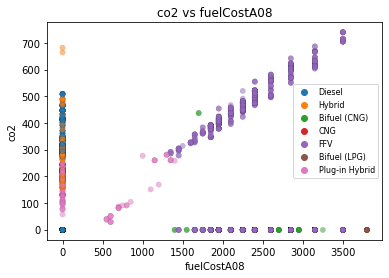

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
             fuelCostA08
fuelCostA08          1.0


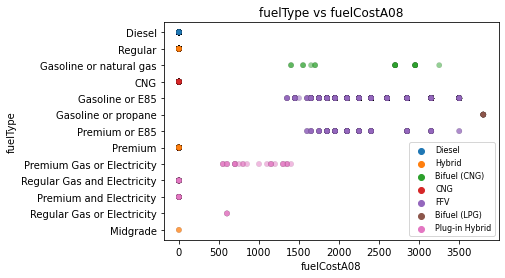

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
           comb08   combA08
comb08   1.000000  0.043965
combA08  0.043965  1.000000


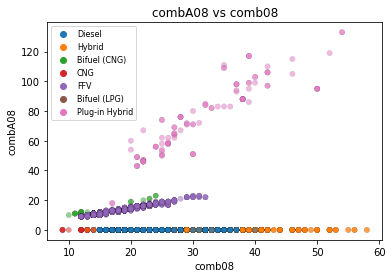

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
          comb08       co2
comb08  1.000000 -0.006835
co2    -0.006835  1.000000


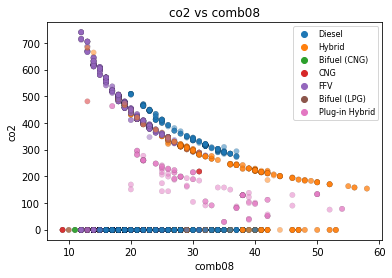

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
        comb08
comb08     1.0


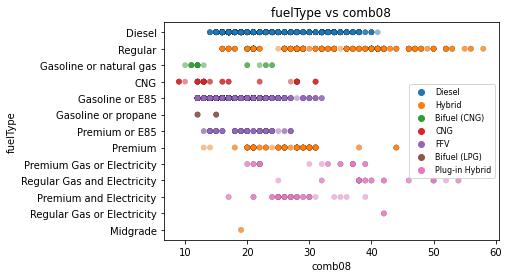

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
          combA08       co2
combA08  1.000000  0.115897
co2      0.115897  1.000000


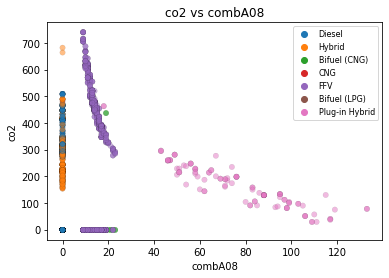

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
         combA08
combA08      1.0


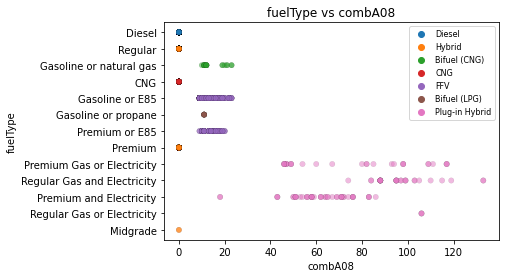

('UCity', 'displ') vs ('UCity', 'cylinders')
Correlation matrix
     co2
co2  1.0


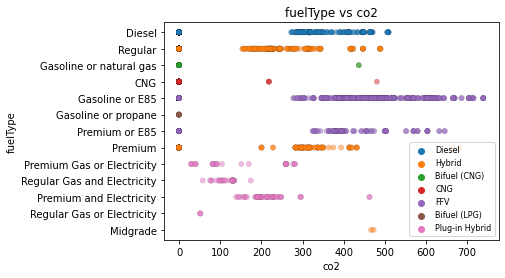

In [139]:
list1 = ['UCity', 'cylinders', 'displ', 'fuelCostA08', 'comb08', 'combA08', 'co2', 'fuelType']
newdf = df[list1 + ['atvType']].dropna()
pairs = list(itertools.combinations(list1, 2))
for pair in pairs:
  print(f'{pairs[1]} vs {pairs[0]}')
  print("Correlation matrix")
  print(newdf[[pair[0], pair[1], 'atvType']].corr())


  fig, ax = plt.subplots()
  sns.scatterplot(data = newdf, x = pair[0], y = pair[1], hue = 'atvType', s = 30, edgecolor = "k", linewidth = 0.1, alpha = 0.5, ax = ax)
  ax.set_xlabel(pair[0])
  ax.set_ylabel(pair[1])
  ax.set_title(f'{pair[1]} vs {pair[0]}')
  plt.legend(prop = {'size' : 8})
  plt.show()


1. **cylinders vs UCity**: In this plot we can see that the Hybrid vehicles have a high UCity compared to the other atvType vehicles. Hybrid vehicles have a more running than other. We also see that the CNG vehicles operating only at 8 cylinders, while FFV, Diesel, Hybrid working at 4, 6 and 8 cylinders. Plug-in Hybrid vehicles are mostly seen working at 2, 3, 4, cylinders - but we also see some at 6, 8.

2. **displ vs UCity**: In this plot we see a clear differentiation between the UCity for Hybrid vehicles (higher UCity) while FFV vehicles with a lower UCity. Diesel vehicles lie in between with respect to the UCity value. With respect to the displ we see CNG vehicles with a higher value while Plug-in Hybrid with a lower value. Hence CNG vehicles have a higher displacement while Plug-in Hybrid are seen on the lower end. 

3. **fuelCostA08 vs UCity**: In this plot we see that the FFV vehicles have a higher fuel cost compared to the rest of the atvType vehicles. Bifuel (LPG) vehicles seem to have the highest fuel cost with less number of vehicles in general. Hybrid and Diesel vehicles have the lowest fuel cost. The UCity of Diesel and FFV is on the lower side while on the higher side for Hybrid vehicles. 

4. **comb08 vs UCity**: In this plot we see the comb08 value for the Hybrid vehicles is high while for Diesel it is low. This is the same distribution in terms of UCity as well. CNG, Bifuel (LPG), FFV vehicles have a low UCity and comb08 values. 

5. **co2 vs UCity**: In this plot we see FFV vehicles have the most co2 value while Diesel vehicles have the least. Plug-in Hybrid vehicles have the co2 value somewhere in the middle of these two. 

## Ans 2. 
If UCity is the dependent variable, we would have to go with the regression approach. This is because UCity column has values that are continuous and not ones with distinct category for classifying them. To make them into a categorical variable for classification we would have to bin the values at a particuar threshold for every category. These can then be classified. 


For building the predictive model we would have to follow the steps:

i. Understand the scope and the requirements of the business problem - what is the final goal of this exercise, to just understand the data, predict a value or clasify into categories. 

ii. Data collection and preprocessing -  this step involves collecting the data from various places. For example if the project is about a particular topic, we can perform data scraping and crawling on blogs, articles on this topic to get relevant data. Data preprocessing involves data cleaning, data tramnformation, data reduction. This step helps us get the data in the format where we can work on it. 

iii. Data Cleaning and Exploratory Data Analysis - data cleaning is one of the most important steps where we would have raw unprocessed data with a lot of unnecessary information. These are a few things we would look for cleaning the data - removing duplicate or irrelavent observations, fix structural errors, filter unwanted outliers, handle missing data. Exploratory Data analysis is performed for understanding the data, how one feature is changes with respect to the other, we understand correlation, presence of outliers, many insights by just looking at the plots. 

iv. Validating the model - we select the model that suits best to our usecase of regression/ classification and performs well with the data. If we have a lot of missing values, a model like Random Forest would perform the best, if we want a simple classification something like logistic regression might give us good results while if our data is unlabelled, K Means algorithm would be the best. Hence according to our data and use case we choose the model that works best. We validate our model works well using evaluation metrics that suit our use case. In most cases accuracy is checked while when we false positives are important we check precision. When false negatives are important to our analysis we check the recall. We could also check the F1 score when both the quantities are important to our analysis. For regression we check the R squared value and the adjusted R squared value for the best fit of the line. 

v. Model Deployment - once we have received the best performing model we deploy it to run on real time data. 

vi. Monitoring and Tracking the Model - we need to monitor and track the performance of the model once deployed in case of any change in data. 

## Ans 3. 
To know which variables we would not be considering as inputs to the model, we would have to do a bit of exploration of the correlation between features and the number of null values the features have. The exploration is done below

In [34]:
fig = px.imshow(df.corr())
fig.show()

<ipython-input-34-a25aa30996d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr())


In [7]:
pd.set_option('display.max_rows', None)
count_zeros = (df == 0).astype(int).sum(axis = 0)
count_non_zeros = (df != 0 ).astype(int).sum(axis = 0)
count_df = pd.DataFrame({'Zero Counts': count_zeros, 'Non Zero Counts': count_non_zeros})
count_df = count_df.sort_values(by = "Zero Counts", ascending = False)
print(count_df)
pd.reset_option('display.max_rows')

                 Zero Counts  Non Zero Counts
charge120              40081                0
highwayCD              40064               17
cityCD                 40056               25
combinedCD             40054               27
charge240b             40019               62
phevBlended            40005               76
phevComb               39974              107
rangeHwyA              39974              107
phevHwy                39974              107
phevCity               39974              107
highwayUF              39974              107
cityUF                 39974              107
rangeCityA             39974              107
combinedUF             39974              107
rangeCity              39940              141
rangeHwy               39940              141
range                  39913              168
charge240              39829              252
cityE                  39806              275
combE                  39806              275
highwayE               39806      

As we see from the above correlation matrix, the boxes in bright yellow represent variables that are highly correlated and we want to avoid such a situation as it would lead to overfitting, bias. The features that are highly correlated and would not consider inputs to the model are:

1. one of city08 and city08U as they have a correlation of 0.9574 which is very high 
2. one of phevHwy and phevComb as they have a correlation of 0.997
3. one of phevCity and phevComb as they have a correlation of 0.998 
4. one of phevCity and phevHwy as they have a correlation of 0.990 
5. one of phevHwy and cityUF as they have a correlation of 0.980
6. one of phevComb and cityUF as they have a correlation of 0.970 
7. one of UHighwayA and highwayA08 as they have a correlation of 0.994 
8. one of UCity and city08 as they have a correlation of 0.997 
9. one of highwayA08U and comb08U as they have a correlation of 0.992
10. one of combE and cityE as they have a correlation of 0.998
11. one of cityUF and combinedUF as they have a correlation of 0.999
12. one of cityCD and combinedCD as they have a correlation of 0.993 
13. one of cityUF and highwayUF as they have a correlation of 0.998 
14. one of city08 and UCity as they have a correlation of 0.997 
15. one of range and rangeHwy as they have a correlation of 0.984 
16. one of highwayE and cityE as they hae a correlation of 0.992 
17. charge120 as it has 40081 rows as zeros 
18. highwayCD as it only has 40064 zero rows and 17 non zero rows 
19. cityCD as it only has 40056 zero rows and 25 non zero rows 
20. charge240b as it only has 40019 zero rows and 62 non zero rows 


## Ans 4. 

**Overfitting**: this refers to an unwanted behvaiour of a Machine Learning algorithm used for predictive modeling. In this situation the training error reduces drastically but the test error is still high. The model learns the train data so well that it fails to generalize the test data. This occurs due to high variance and low bias. 

**How to evaluate overfitting**: We need to plot of the model performance on the train and test set. It is calculated at each point during training. This plot is called the learning plot curve, showing one curve model performance on the training set and one curve for the test set for each increment of learning. The way to know overfitting can be seen on learning curve plots where model performance on the training dataset continues to improve and performance on the test or validation set improves to a point and then begins to get worse. We use a method - K-fold cross validation. The training process consists of a series of iterations. During each iteration, the steps are:
1.    Keep one subset as the validation data and train the machine learning model on the remaining K-1 subsets.
2.    Observe how the model performs on the validation sample.
3.    Score model performance based on output data quality.

Iterations repeat until you test the model on every sample set. You then average the scores across all iterations to get the final assessment of the predictive model.

**How to avoid overfitting**: 
1. Early stopping: this pauses the training phase before the machine learning model learns the noise of the data. Getting the timing right or the results would not be accurate. 
2. Pruning: Feature selection—or pruning—identifies the most important features within the training set and eliminates irrelevant ones.
3. Regularization: Regularization is a collection of training/optimization techniques that seek to reduce overfitting. These methods try to eliminate those factors that do not impact the prediction outcomes by grading features based on importance.
4. Ensembling: Ensembling combines predictions from several separate machine learning algorithms. Some models are called weak learners because their results are often inaccurate. Ensemble methods combine all the weak learners to get more accurate results. They use multiple models to analyze sample data and pick the most accurate outcomes. The two main ensemble methods are bagging and boosting. Boosting trains different machine learning models one after another to get the final result, while bagging trains them in parallel. 
5. Data augmentation: Data augmentation is a machine learning technique that changes the sample data slightly every time the model processes it. You can do this by changing the input data in small ways. When done in moderation, data augmentation makes the training sets appear unique to the model and prevents the model from learning their characteristics. 



**Underfitting**: A model is said to be underfit when it has poor performance on the training data and results in unreliable results. Underfitting occurs due to high bias and low variance. This leads to higher training and validation errors since the model is not complex enough to classify the underlying data.

**How to evaluate underfitting**: We can see this by plotting the train and test errors. 

**How to avoid underfitting**: 
1. Increasing the Model Complexity: It's possible that your model is underfitting because it isn't robust enough to capture trends in the data. Using a more sophisticated model, for example by changing from a linear to a non-linear approach or by adding hidden layers to your Neural Network, may be very beneficial in this situation.
2. Reducing Regularization: By default, the algorithms you employ include regularization parameters to prevent overfitting. Thus, they sometimes hinder the algorithm from learning. Slight adjustments to their settings usually assist when trying to reduce underfit.
3. Adding Features to Training Data: As opposed to overfitting, your model may be underfitting if the training data is too limited or simple. If your model is underfitting, it may not have the characteristics required to identify key patterns and make accurate forecasts and predictions.However, underfitting can be alleviated by adding features and complexity to your data.
